# Collecting the data {from Kaggle} 

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/Titanic/Titanic.csv')
print(data.shape)
data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
print('No. of Passengers: ' + str(len(data.index)))

No. of Passengers: 891


# Analyzing the Data

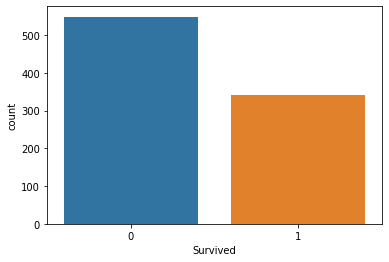

In [7]:
sns.countplot(x="Survived", data=data)

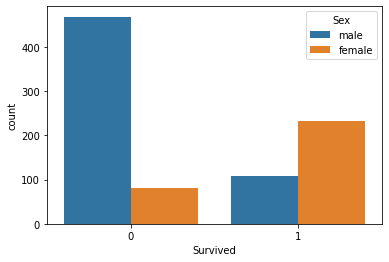

In [8]:
sns.countplot(x="Survived", hue="Sex", data=data)

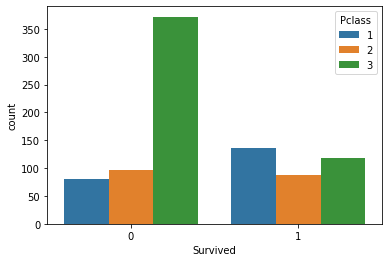

In [9]:
sns.countplot(x="Survived", hue="Pclass", data=data)

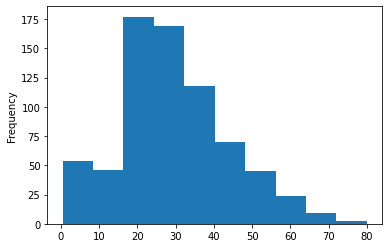

In [10]:
data["Age"].plot.hist()

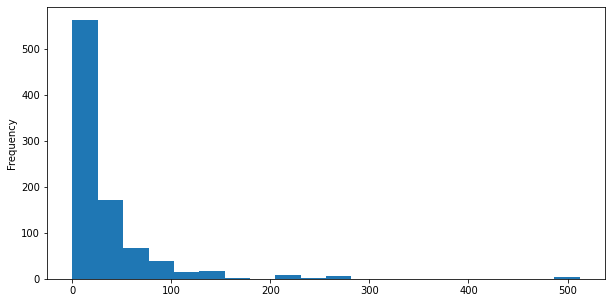

In [11]:
data["Fare"].plot.hist(bins=20, figsize=(10,5))

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


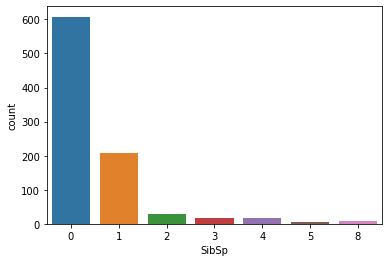

In [13]:
sns.countplot(x="SibSp", data=data)

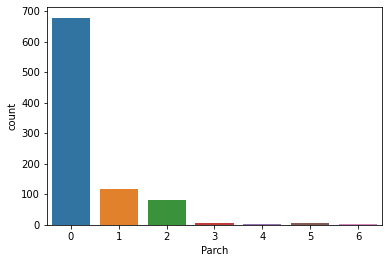

In [14]:
sns.countplot(x="Parch", data=data)

# Data Wrangling

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#sns.heatmap(data.isnull(), yticklabels==False) # Null Value Visualization

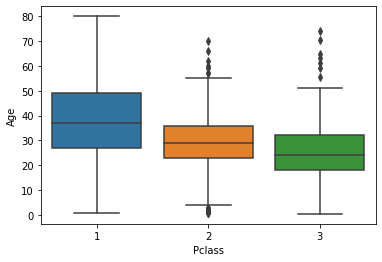

In [17]:
sns.boxplot(x="Pclass", y="Age", data=data)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data.drop("Cabin", axis=1, inplace=True)

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
data.dropna(inplace=True)

In [22]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
#sex.head(5)

In [24]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
Pcl=pd.get_dummies(data['Pclass'],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [26]:
data=pd.concat([data,sex,embark,Pcl],axis=1) # add after data wrangling, also look if other can be wrangled

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [28]:
data.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1, inplace=True)

In [29]:
data.head() 

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [30]:
data.drop(['Pclass'],axis=1, inplace=True)

In [31]:
data.head() # All Data is wrangled Successfully

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Training & Testing the Data

# Train Data

In [38]:
X= data.drop("Survived", axis=1) 
y= data["Survived"]

In [39]:
from sklearn.model_selection import train_test_split # sklearn for Train test previously model_selection = cross_validation

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [41]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression(max_iter=5000)

In [46]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [50]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test, predictions) #AN.PN=102,AN.PY=24,AY.PN=25,AY.PY=63 where P-predicted,A-actual,N-NO,Y-YES

array([[102,  24],
       [ 25,  63]])

**Accuracy Test**

In [55]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,predictions)*100

77.10280373831776